<a href="https://colab.research.google.com/github/rtaglega53/pedropicapiedra/blob/master/tarea_covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reconocimiento de Patrones
##Dr. Carlos Villaseñor
##Lección 3 - Regresión no lineal y autoregresión

## Regresión no lineal

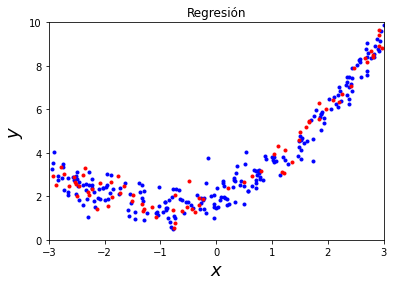

In [ ]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

np.random.seed(42)
m = 300
r = 0.5
ruido = r* np.random.randn(m, 1)
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + ruido


xtrain, xtest, ytrain, ytest = train_test_split(x,y)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

K vecinos más cercanos

Train:  0.9633737973281776
Test:  0.9642878827542761


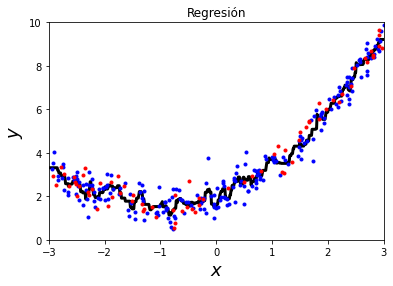

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=5, weights = 'uniform')
model.fit(xtrain, ytrain)

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,'k-', linewidth=3)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

Arboles de Desición


Train:  1.0
Test:  0.9389274945378348


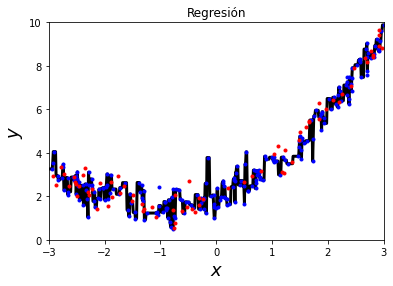

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=100)
model.fit(xtrain, ytrain)

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,'k-', linewidth=3)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

Máquina de Soporte Vectorial

Train:  0.9541969014125329
Test:  0.9667922107451523


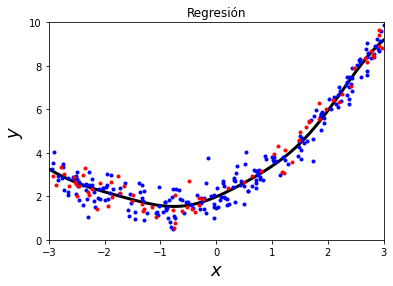

In [ ]:
from sklearn.svm import SVR

model = SVR(gamma='scale', C=10, epsilon=0.1, kernel='rbf')
model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain.ravel()))
print('Test: ', model.score(xtest, ytest.ravel()))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,'k-', linewidth=3)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

Kernel Ridge

Train:  0.9552385775592783
Test:  0.9659975625747272


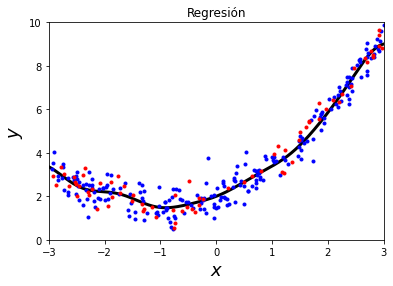

In [ ]:
from sklearn.kernel_ridge import KernelRidge

model = KernelRidge(alpha=0.1, kernel= 'rbf')
model.fit(xtrain, ytrain.ravel())

print('Train: ', model.score(xtrain, ytrain.ravel()))
print('Test: ', model.score(xtest, ytest.ravel()))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,'k-', linewidth=3)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

Proceso Gaussiano

Train:  0.9538908541541176
Test:  0.9626552911988783


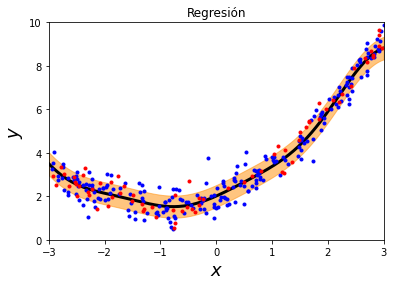

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

gp_kernel = ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 1e1)) \
            + WhiteKernel(1e-1)
model = GaussianProcessRegressor(kernel=gp_kernel)

model.fit(xtrain,ytrain)


print('Train: ', model.score(xtrain, ytrain.ravel()))
print('Test: ', model.score(xtest, ytest.ravel()))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred, y_std = model.predict(x_new, return_std=True)
plt.plot(x_new, y_pred,'k-', linewidth=3)
plt.fill_between(x_new.ravel(), y_pred.ravel() - y_std.ravel(),
                 y_pred.ravel() + y_std.ravel(), color='darkorange',
                 alpha=0.5)

#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

Perceptrón Multicapa

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train:  0.938663997228792
Test:  0.9524741508069572


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


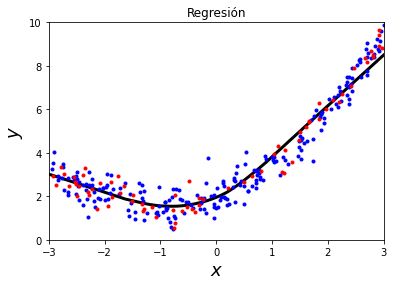

In [ ]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor()
model.fit(xtrain,ytrain)


print('Train: ', model.score(xtrain, ytrain.ravel()))
print('Test: ', model.score(xtest, ytest.ravel()))

x_new = np.linspace(-3, 3, 600).reshape(-1, 1)
y_pred = model.predict(x_new)
plt.plot(x_new, y_pred,'k-', linewidth=3)


#Dibujar datos
plt.plot(xtrain, ytrain, "b.")
plt.plot(xtest, ytest, "r.")
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.title('Regresión')
plt.axis([-3, 3, 0, 10])
plt.show()

## Autoregresión

Primeramente vamos a leer unos datos

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
uploaded = files.upload()

Saving 200930COVID19MEXICO.csv to 200930COVID19MEXICO (1).csv


In [4]:
import collections
df = pd.read_csv('200930COVID19MEXICO.csv', encoding='windows-1252')
# labels = list(df.drop(columns=['id','date','price','zipcode']).columns)
# 
data = []
y = np.asanyarray(df['FECHA_INGRESO'])
print(df)
for element in y:
  if element > '2020-05-01':
    data.append(element)
y_filtered = np.asanyarray(data)
print(y_filtered.shape)
  
x = np.asanyarray([i for i in range(y_filtered.shape[0])])

print(collections.Counter(y_filtered))
diccionario = []
contador = []
print(diccionario)
for dia, value in collections.Counter(y_filtered).items():
  diccionario.append({'date':dia, 'cases':value})
  contador.append(value)
  # print(dia, value)
print(diccionario)
diccionario.sort(key = lambda x:x['date']) 
print(diccionario)
print (dias)
print (contador)
dias_a = np.asanyarray(dias)
contador_a = np.asanyarray(contador)
print('si')
dias = []
contador = []
for element in diccionario:
  for key, value in element.items():
    if key == 'date':
      dias.append(value)
#      print(key, value)
    else:
      contador.append(value)
#      print(key, value)
print(dias)
print(contador)
plt.plot(dias, contador)

NameError: ignored

Veamos estos datos

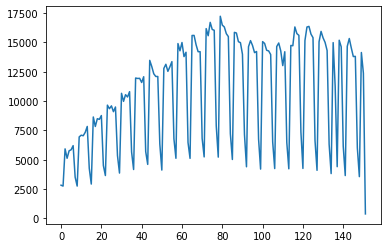

In [8]:

plt.plot(contador)

Vemos como se relaciona un dia con el anterior

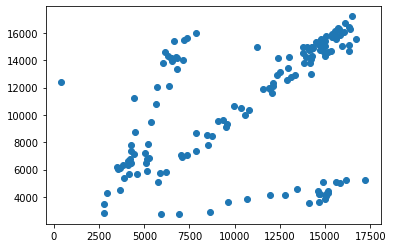

In [14]:
 plt.scatter(contador[1:], contador[:-1])

Calculemos la correlación


In [13]:
np.corrcoef(contador[1:], contador[:-1])

array([[1.        , 0.44008983],
       [0.44008983, 1.        ]])

Ahora bien podemos ver como se relaciona un día con otro solo cambiando el retardo

Podemos graficar estas correlaciones de la siguiente manera

In [3]:
df2 = pd.DataFrame(contador)
print (df2)

NameError: ignored

Vamos a preparar los datos

In [2]:

df2 = pd.DataFrame(contador)
print (df2)
delay = 5
for i in range(1, delay+1):
  df2 = pd. concat([df2, df2[['0']].shift(-i)], axis=1)
df2= df2[:-delay]
print(df2)

NameError: ignored

Seleccionemos nuestros datos

In [34]:
x = np.asanyarray(df2.iloc[:,:-1])
y = np.asanyarray(df2.iloc[:,-1])
print(x)
print(y)

[[ 2836.  2760.  5929. ...  7338.  7839.  4273.]
 [ 2760.  5929.  5128. ...  7839.  4273.  2933.]
 [ 5929.  5128.  5766. ...  4273.  2933.  8645.]
 ...
 [14523. 13792. 13807. ...    nan    nan    nan]
 [13792. 13807.  6015. ...    nan    nan    nan]
 [13807.  6015.  3564. ...    nan    nan    nan]]
[ 2933.  8645.  7837.  8498.  8443.  8767.  4507.  3658.  9653.  9351.
  9590.  9098.  9495.  5355.  3869. 10661.  9977. 10545. 10346. 10803.
  5661.  4172. 11962. 11926. 11935. 11582. 12073.  5699.  4607. 13467.
 12947. 12325. 12093. 12094.  6345.  4124. 12780. 13133. 12531. 12921.
 13357.  6790.  5127. 14897. 14281. 14986. 13788. 14157.  6469.  5121.
 15586. 15591. 14793. 14206. 14205.  6821.  5245. 16171. 15565. 16702.
 16100. 16028.  7885.  5226. 17224. 16469. 16310. 15740. 15493.  7218.
  5026. 15851. 15799. 15058. 14974. 13986.  7154.  4405. 14626. 15148.
 14731. 14126. 14222.  6759.  4207. 15063. 14907. 14326. 14271. 13964.
  6518.  4253. 14642. 14946. 14274. 13019. 14201.  6472.  423

Ahora vamos a construir y probar el modelo

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

xtrain, xtest, ytrain, ytest = train_test_split(x,y)

model = LinearRegression()

model.fit(xtrain, ytrain)

print('Train: ', model.score(xtrain, ytrain))
print('Test: ', model.score(xtest, ytest))

ValueError: ignored

Predicción 


In [ ]:
last_days = (df[-delay:].Temp.values).resahpe(1,-1)
print(last_days)

pred = model.predict(last_days)
print('Prediccion de contagios', pred)